# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цель исследования**:
1. Выполнить предобработку данных.
2. Провести исследовательский анализ данных.
3. Составить портрет пользователя каждого региона.
4. Проверить гипотезы.

Путь к файлу: /datasets/games.csv.

### Откроем файл с данными и изучим общую информацию.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [5]:
games = pd.read_csv('/content/games.csv')
games.head(10) # выведем первые 10 строчек датафрейма data на экран.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведем основную информацию о датафрейме.**

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.shape # сколько в DF строк и столбцов

(16715, 11)

In [ ]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Общая гистограмма для всех столбцов таблицы.**

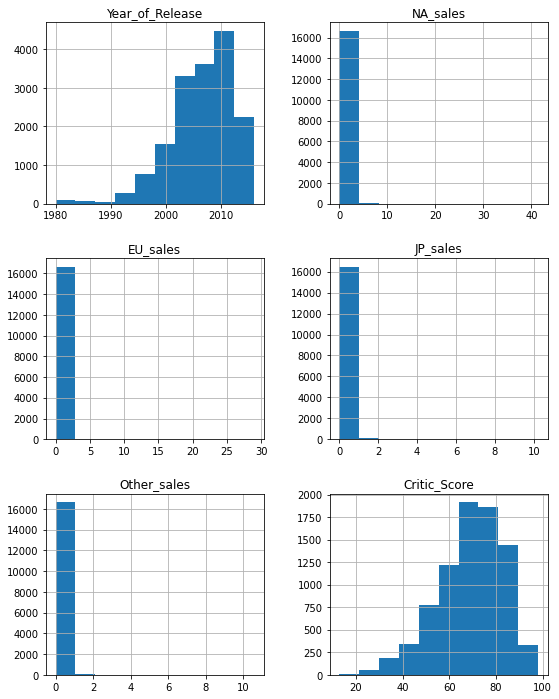

In [ ]:
games.hist(figsize=(9, 12))
plt.show()

**По изученным данным можно сделать вывод:**
* в датафрейме 16715 строк и 11 столбцов
* необходимо изменить тип данных в столбцах Year_of_Release и User_Score
* необходимо привести к единому регистру названия столбцов
* необходимо удалить пропуски и дубликаты.

Гистограммы строятся для столбцов с типом данных int и float. Отсутствует гистограмма оценки пользователей. На этапе подготовки данных мы изменим тип данных в этом столбце. По оценке критиков можно сказать, что основная масса оценок выше среднего. По годам релиза: пик выпуска новых игр приходится к 2009 году. Продажи в разных регионах разнятся: больше всего игр продано в Северной Америке. Так же можно сделать вывод о наличии выбросов в данных о количестве проданных экземпляров.

### Подготовим данные.

#### Заменим названия столбцов (приведём к нижнему регистру).

In [ ]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Преобразуем данные в нужные типы и преобразуем данные в нужные типы и обработаем пропуски.

In [ ]:
missing = games.isna().sum()
print(missing[missing > 0])

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [ ]:
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm') # колличество пропусков в %

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


*Тип столбца 'year_of_release' - float64 и в нём есть пропуски. Заменить тип этого столбца на int64 можно только при отсутствии пропусков. Так как процент пропусков от общего количества составляет 2%, то эти строки можно удалить и преобразовать столбец.*

In [ ]:
games.dropna(subset=['year_of_release'], inplace=True) # удалим пропуски

games['year_of_release'] = games['year_of_release'].astype('int') # год релиза - целое число

*В столбцах 'name' и 'genre' всего по 2 пропуска. Выведем строки с пропусками в столбце 'genre'.*

In [ ]:
data=[np.nan]
games[games.genre.isin(data)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


*Стоки с пропусками в столбцах 'name' и 'genre' совпадают. Достаточно удалить только пропуски в 'genre'.*

In [ ]:
games.dropna(subset=['genre'], inplace=True)

*Тип столбца 'user_score' - object, хотя по исходным данным рейтинг пользователей от 0 до 10 и тип столбца должен быть float64. Посмотрим уникальные значения столбца.*

In [ ]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*В списке уникальных значений есть tbd. Заменим его на NaN и изменим тип столбца на float64.*

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', np.nan) # заменили значения tbd на пропуски
games['user_score'] = games['user_score'].astype('float') # изменили тип на float64

In [ ]:
games['user_score'].unique() # проверяем

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

*Изучим столбец рейтинга компьютерых игр*

In [ ]:
games['rating'].unique() # посмотрим уникальные значения

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*Согласно википедии:*

- EC - Для детей младшего возраста
- E - Для всех. Ранее "K-A" ("Kids to Adults")
- E10+ - Для всех от 10 лет и старше
- T - Подросткам
- M - Для взрослых
- AO - Только для взрослых
- RP - Рейтинг ожидается
- RP 17+ - Рейтинг ожидается - примерно 17+

*Соответственно рейтинг Е и K-A можно объединить.*



In [ ]:
games['rating'] = games['rating'].replace('K-A', 'E')

*Заменим пропуски в столбце 'rating' на значение 'undefined'.*

In [ ]:
games['rating'] = games['rating'].replace(np.nan, 'undefined')

In [ ]:
games['rating'].unique() # проверим

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
missing = games.isna().sum()
print(missing[missing > 0])

critic_score    8461
user_score      8981
dtype: int64


*Оставим пропуски в столбцах 'critic_score' и 'user_score'.*

**Пропуски в таблицах обусловлены человеческим фактором либо на момент заполнения данных еще не были определены название, время выхода игры, рейтинг и т.д.**

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
games['sum_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [ ]:
games.head() # проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Проверим данные на дубликаты.**

In [ ]:
games.duplicated().sum()

0

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано:)</div>

### Проведём исследовательский анализ данных.

#### Посчитаем сколько игр выпускалось в разные годы.

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

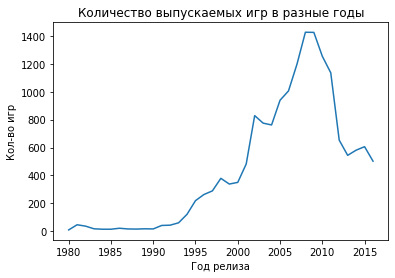

In [ ]:
count_games = games.groupby('year_of_release')['name'].count()
count_games.plot(x='year_of_release', title='Количество выпускаемых игр в разные годы')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.show
count_games

*Видим, что с 1990 года шёл активный рост выпуска компьютерных игр. После 2009 заментно снижение. Выделим для анализа последние три года, так как на первый взгляд видна динамика на уменьшение количества выпускаемых игр, с другой стороны данные за 2016 год неполные.*

#### Посчитаем продажи по платформам в разные годы.

In [ ]:
platform_sales = games.groupby(['platform', 'year_of_release'])['name'].count()
platform_sales

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: name, Length: 238, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

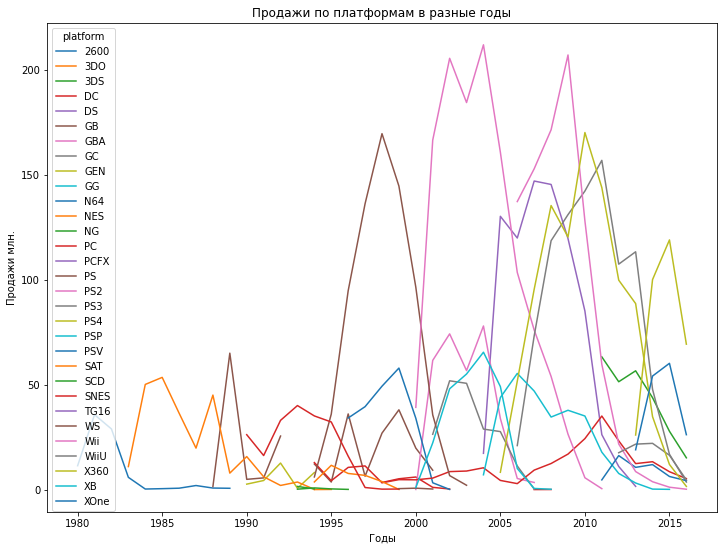

In [ ]:
games.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum').plot(figsize=(12,9))
plt.xlabel('Годы')
plt.ylabel('Продажи млн.')
plt.title('Продажи по платформам в разные годы')
plt.show

*Новые платформы появляются и исчезают после того, как продажи сводятся к нулю. Среднее время "жизни" платформы от 5 лет: выпуск игры, пик продаж и сход на нет.*

*Построим гистограмму за актуальный период.*

<function matplotlib.pyplot.show(close=None, block=None)>

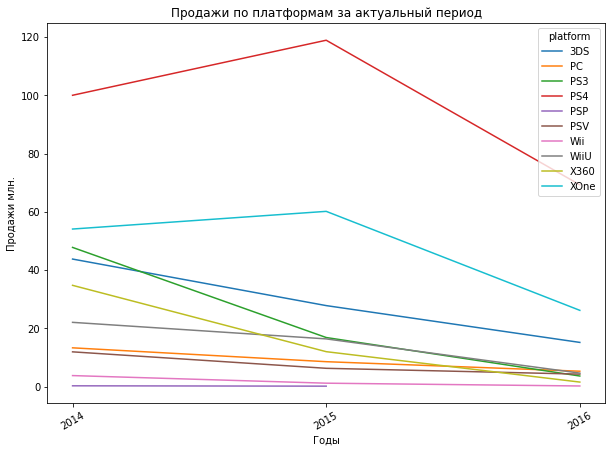

In [ ]:
games_result = games.query('2014 <= year_of_release <= 2016')
games_result.pivot_table(
    index='year_of_release',
    columns='platform',
    values='sum_sales',
    aggfunc='sum'
).plot(rot=30, figsize=(10,7))
# зададим название гистограммы и названия осей
plt.xlabel('Годы')
plt.ylabel('Продажи млн.')
plt.title('Продажи по платформам за актуальный период')
# назначим частоту тиков по оси х
plt.xticks(np.arange(games_result['year_of_release'].min(), games_result['year_of_release'].max()+1, 1))
plt.show

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделано:)</div>

#### Посчитаем продажи по платформам за интересующий период.

In [ ]:
games_result.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'].sum()

/tmp/ipykernel_242/3492401828.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  games_result.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales'].sum()


,na_sales,eu_sales,jp_sales,other_sales,sum_sales
platform,,,,,
3DS,22.64,16.12,44.24,3.68,86.68
PC,7.23,17.97,0.00,1.85,27.05
PS3,22.05,25.54,11.22,9.37,68.18
PS4,98.61,130.04,15.02,44.48,288.15
PSP,0.00,0.00,0.36,0.00,0.36
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07
WiiU,19.36,13.15,7.31,3.16,42.98
X360,28.30,15.49,0.08,4.35,48.22


*Можно выделить 5 лидеров продаж: PS4, XOne, 3DS, PS3, X360.  Выделим пять этих платформ за интересующий нас период для дальнейшего анализа .*

In [ ]:
games_result = games_result.query("platform == ['PS4', 'XOne', '3DS', 'PS3', 'X360']")
games_result

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


*Построим график распределения по интересующим нас платформам.*

Text(0.5, 1.0, 'График распределения по интересующим нас платформам за актуальный период')

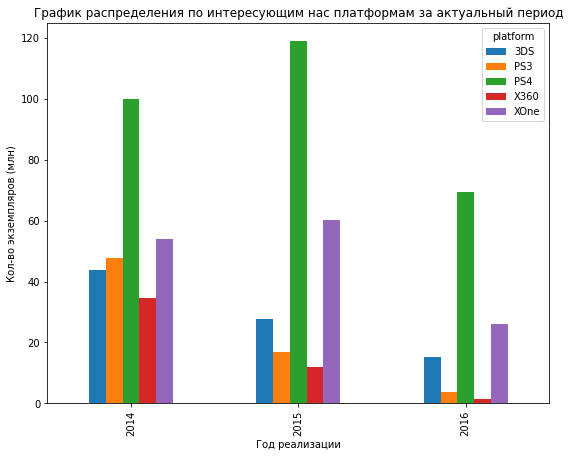

In [ ]:
games_result.pivot_table(
    index='year_of_release',
    columns='platform',
    values='sum_sales',
    aggfunc='sum'
).plot(kind='bar', figsize=(9,7))

# название осей и гистограммы
plt.xlabel('Год реализации')
plt.ylabel('Кол-во экземпляров (млн)')
plt.title('График распределения по интересующим нас платформам за актуальный период')


*Можно сделать вывод, что самая прибыльная платформа - PS4. Продажи игр на ней разительно отличаются от других платформ. Вторая выделяющаяся платформа - XOne. Так как данные за 2016 год неполные, оставим в рассмотрении пять платформ.*

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

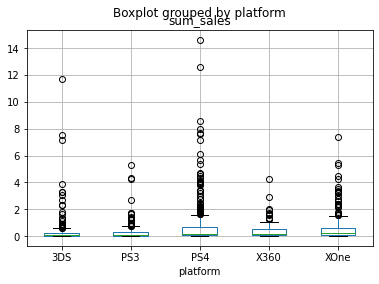

In [ ]:
games_result.boxplot(column='sum_sales', by='platform')
plt.show()

*Видны выбросы - скорее всего это большие продажи игр, которые в момент стали популярными.*

*По диаграмме размаха видим частые выбросы. Основные значения продаж находятся в диапазоне от 0 до 2 млн. Построим диаграмму с учетом этих значений.*

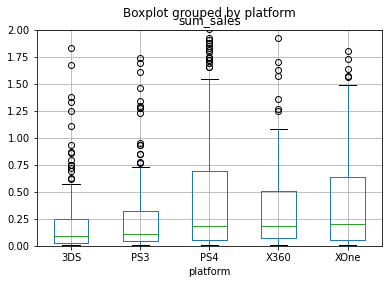

In [ ]:
games_result.boxplot(column='sum_sales', by='platform')
plt.ylim(0, 2)
plt.show()

*Несмотря на большое количество выбросов, медианные значения рассматриваемых платформ лежат в диапазоне от 0,09 до 0,21 млн экземпляров за интересующий период. 75% значений лежат ниже 0,7 млн экземпляров за рассматриваемый период.*

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

*Для анализа возьмём платформу PS4 - лидер попродажам за интересующий период.*

*Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.*

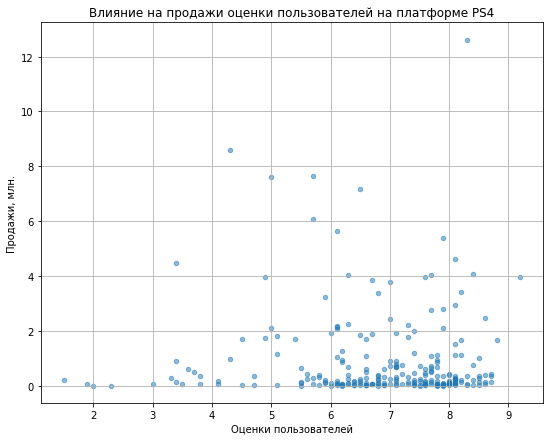

In [ ]:
# по отзывам пользователей
games_result[games_result['platform']=='PS4'].plot(
    x='user_score',
    y='sum_sales',
    kind='scatter',
    alpha=0.5,
    figsize=(9,7),
    grid=True
)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Влияние на продажи оценки пользователей на платформе PS4')
plt.show()

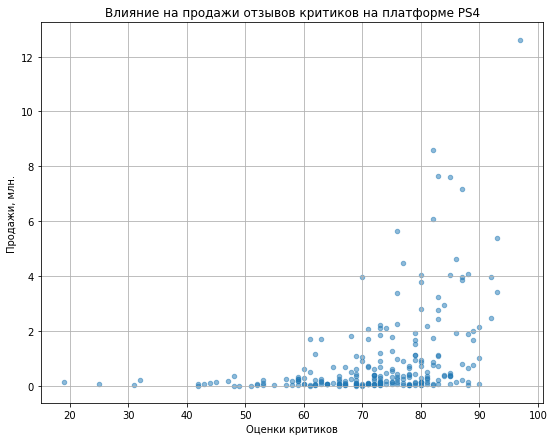

In [ ]:
# по отзывам критиков
games_result[games_result['platform']=='PS4'].plot(
    x='critic_score',
    y='sum_sales',
    kind='scatter',
    alpha=0.5,
    figsize=(9,7),
    grid=True
)
plt.xlabel('Оценки критиков')
plt.ylabel('Продажи, млн.')
plt.title('Влияние на продажи отзывов критиков на платформе PS4')
plt.show()

*По гистограммам видно,что отзывы критиков имеют большее влияние на количество проданных экземпляров.*

*Посчитаем корреляцию между отзывами и продажами.*

In [ ]:
# коэффициент корреляции оценки пользователей и критиков
games_result_ps4 = games_result[games_result['platform']=='PS4']
print('Коэффициент корреляции:', games_result_ps4['critic_score'].corr(games_result_ps4['user_score']))

Коэффициент корреляции: 0.546434245119031


In [ ]:
# коэффициент корреляции оценки критиков и продаж
print('Коэффициент корреляции:', games_result_ps4['critic_score'].corr(games_result_ps4['sum_sales']))

Коэффициент корреляции: 0.40266141068104083


In [ ]:
# коэффициент корреляции оценки пользователей и продаж
print('Коэффициент корреляции:', games_result_ps4['user_score'].corr(games_result_ps4['sum_sales']))

Коэффициент корреляции: -0.040131589472697356


*Оценки пользавателей и критиков в основном выше среднего. Коэффициент корреляции показывает зависимость роста оценок пользователей от оценок критиков. Так же оценки критиков имеют влияние на рост продаж, а оценки пользователей не имеют влияние или очень слабое.*

*Посчитаем коэффициент корреляци для платформы XOne.*

In [ ]:
games_result_xone = games_result[games_result['platform']=='XOne']
print('Коэффициент корреляции по оценкам критиков:', games_result_xone['critic_score'].corr(games_result_xone['sum_sales']))
print('Коэффициент корреляции по оценкам пользователей:', games_result_xone['user_score'].corr(games_result_xone['sum_sales']))

Коэффициент корреляции по оценкам критиков: 0.42867694370333226
Коэффициент корреляции по оценкам пользователей: -0.0703839280647581


*Посчитаем коэффициент корреляци для платформы 3DS.*

In [ ]:
games_result_3ds = games_result[games_result['platform']=='3DS']
print('Коэффициент корреляции по оценкам критиков:', games_result_3ds['critic_score'].corr(games_result_3ds['sum_sales']))
print('Коэффициент корреляции по оценкам пользователей:', games_result_3ds['user_score'].corr(games_result_3ds['sum_sales']))

Коэффициент корреляции по оценкам критиков: 0.314117492869051
Коэффициент корреляции по оценкам пользователей: 0.2151932718527028


*Посчитаем коэффициент корреляци для платформы PS3.*

In [ ]:
games_result_pc3 = games_result[games_result['platform']=='PS3']
print('Коэффициент корреляции по оценкам критиков:', games_result_pc3['critic_score'].corr(games_result_pc3['sum_sales']))
print('Коэффициент корреляции по оценкам пользователей:', games_result_pc3['user_score'].corr(games_result_pc3['sum_sales']))

Коэффициент корреляции по оценкам критиков: 0.44657460493190704
Коэффициент корреляции по оценкам пользователей: -0.16676141347662118


*Изучив коэффциент корреляции по нескольким платформам за интересующий период, можно сделать вывод, что наш первоначальный анализ подтвердился: оценки критиков имеют большее влияние на продажи.*

#### Соотнесём выводы с продажами игр на других платформах.

In [ ]:
games.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


*Построим диаграмму размаха для всех платформ*

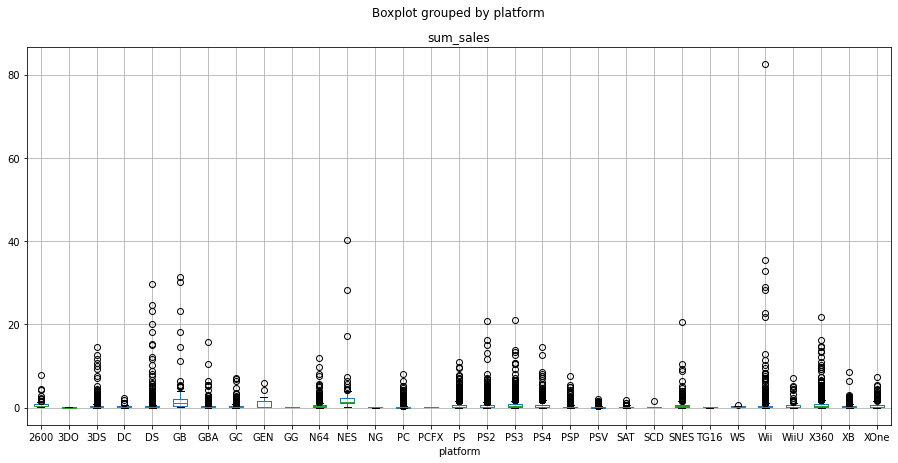

In [ ]:
games.boxplot(column='sum_sales', by='platform', figsize=(15,7))
plt.show()

*По диаграмме размаха видим частые выбросы. Основные значения продаж находятся в диапазоне от 0 до 5 млн. Построим диаграмму с учетом этих значений.*

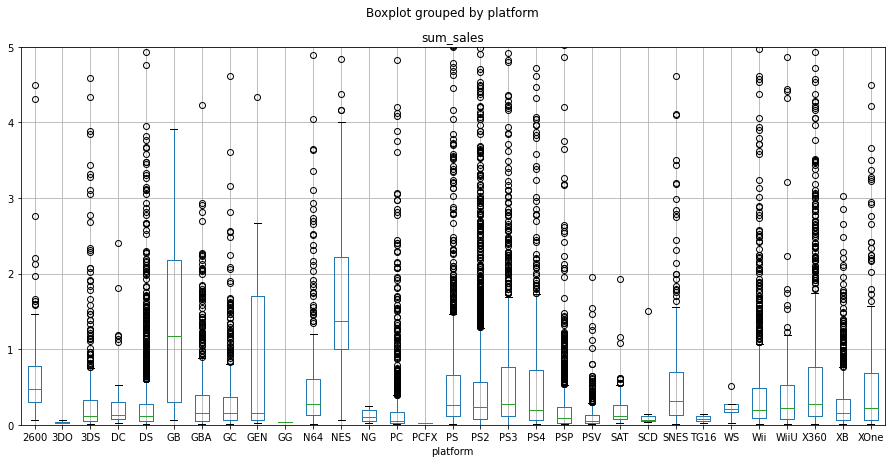

In [ ]:
games.boxplot(column='sum_sales', by='platform', figsize=(15,7))
plt.ylim(0, 5)
plt.show()

*Посчитаем коэффициент корреляции для всех платформ.*

In [ ]:
print('Коэффициент корреляции продаж от оценок пользователей:', games['sum_sales'].corr(games['user_score']))
print('Коэффициент корреляции продаж от оценок критиков:', games['sum_sales'].corr(games['critic_score']))

Коэффициент корреляции продаж от оценок пользователей: 0.08798399271321648
Коэффициент корреляции продаж от оценок критиков: 0.2453488454741138


*Видим по всем платформам, что оценки критиков имеют большее влияние на продажи, чем оценка пользователей. Оценка пользователей почти не влияет на продажи.*

#### Посмотрим на общее распределение игр по жанрам.

In [ ]:
games.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='median'
).sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


*Построим диаграмму и посмотрим распределение в процентах.*

<AxesSubplot:ylabel='sum_sales'>

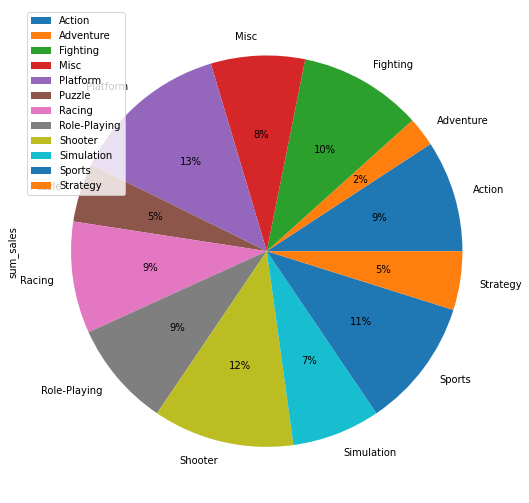

In [ ]:
games_genre = games.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='median'
)
games_genre.plot(kind='pie', y='sum_sales', autopct='%1.0f%%', figsize=(9,9))

*Самые популярные жанры за весь период: Platform, Shooter и Sports. Наименее популярные: Puzzle, Strategy и Adventure.*

*Проведем анализ по актуальнму периоду.*

In [ ]:
games_result.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='median'
).sort_values(by='sum_sales', ascending=False)

,sum_sales
genre,
Shooter,0.680
Sports,0.280
Role-Playing,0.165
Platform,0.145
Fighting,0.130
Racing,0.125
Simulation,0.120
Action,0.115
Misc,0.110


*Построим диаграмму и посмотрим распределение в процентах.*

<AxesSubplot:ylabel='sum_sales'>

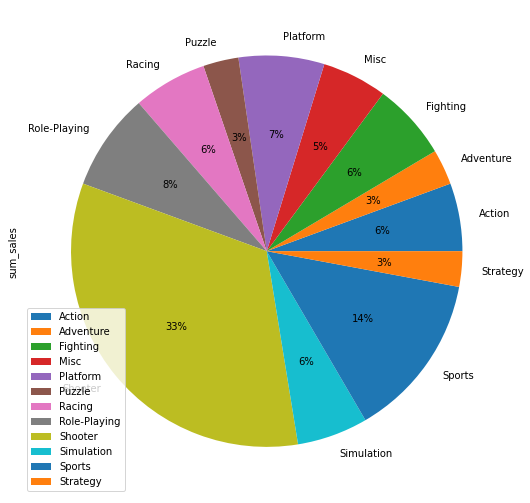

In [ ]:
games_result_genre = games_result.pivot_table(
    index='genre',
    values='sum_sales',
    aggfunc='median'
)
games_result_genre.plot(kind='pie', y='sum_sales', autopct='%1.0f%%', figsize=(9,9))

*Лидер продаж за актуальный период - жанр Shooter, далее по популярности Sports и Platform.\
Наименее популярны: Adventure, Puzzle, Strategy.*

### Составим портрет пользователя каждого региона.

**Определим для пользователя каждого региона (NA, EU, JP):**
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).

#### Самые популярные платформы (топ-5).

##### Самые популярные платформы в Северной Америке. Топ-5.

<function matplotlib.pyplot.show(close=None, block=None)>

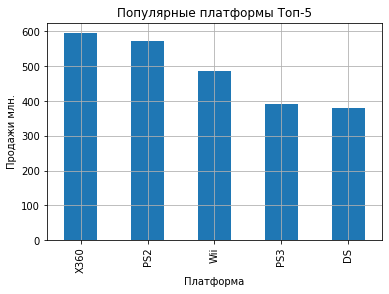

In [ ]:
# группируем по платформе
platform_all_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_all_na.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Самые популярные платформы в Северной Америке за интересующий период. Топ-5.*

<function matplotlib.pyplot.show(close=None, block=None)>

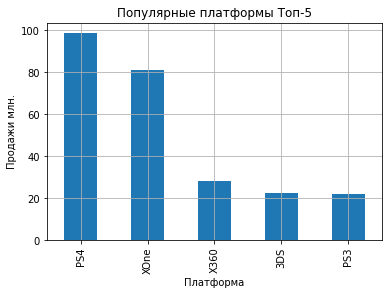

In [ ]:
# группируем по платформе
platform_top_na = games_result.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_top_na.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Доля продаж в Северной Америке за интересующий период.*

Доля продаж в Северной Америке:
platform
PS4     38.996322
XOne    32.139044
X360    11.191521
3DS      8.953217
PS3      8.719896
Name: na_sales, dtype: float64


Text(0, 0.5, 'Доля в процентах')

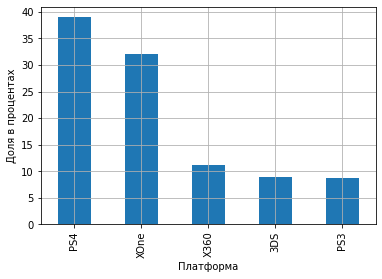

In [ ]:
na_sales_sum = games_result['na_sales'].sum() # Общая сумма продаж в С.Америке
percent_na = games_result.groupby('platform')['na_sales'].sum() / na_sales_sum * 100

print('Доля продаж в Северной Америке:')
print(percent_na.sort_values(ascending=False).head())
percent_na.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля в процентах')

##### Самые популярные платформы в Европе. Топ-5.

<function matplotlib.pyplot.show(close=None, block=None)>

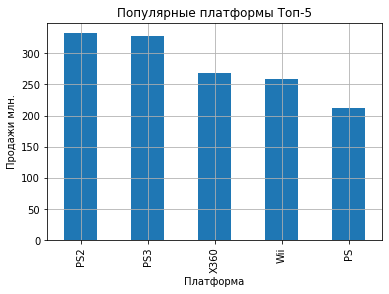

In [ ]:
# группируем по платформе
platform_all_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_all_eu.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Самые популярные платформы в Европе за интересующий период. Топ-5.*

<function matplotlib.pyplot.show(close=None, block=None)>

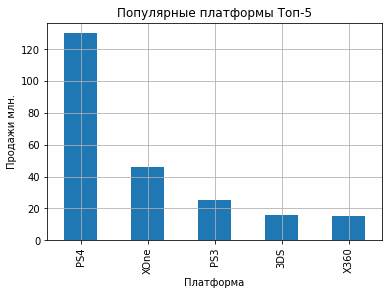

In [ ]:
# группируем по платформе
platform_top_eu = games_result.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_top_eu.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Доля продаж в Европе.*

Доля продаж в Европе:
platform
PS4     55.705963
XOne    19.812371
PS3     10.940713
3DS      6.905415
X360     6.635538
Name: eu_sales, dtype: float64


Text(0, 0.5, 'Доля в процентах')

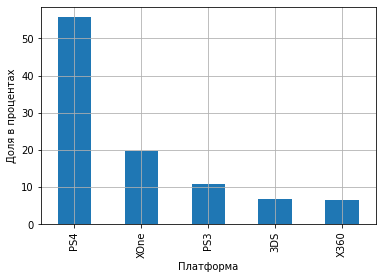

In [ ]:
eu_sales_sum = games_result['eu_sales'].sum() # Общая сумма продаж в Европе
percent_eu = games_result.groupby('platform')['eu_sales'].sum() / eu_sales_sum * 100


print('Доля продаж в Европе:')
print(percent_eu.sort_values(ascending=False).head())
percent_eu.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля в процентах')

##### Самые популярные платформы в Японии. Топ-5.

<function matplotlib.pyplot.show(close=None, block=None)>

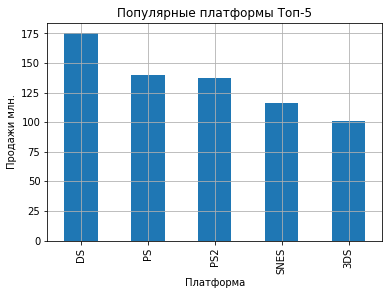

In [ ]:
# группируем по платформе
platform_all_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_all_jp.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Самые популярные платформы в Японии за интересующий период. Топ-5.*

<function matplotlib.pyplot.show(close=None, block=None)>

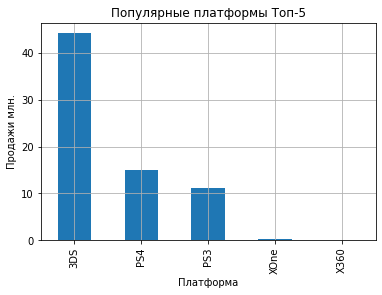

In [ ]:
# группируем по платформе
platform_top_jp = games_result.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

# построим гистограмму
platform_top_jp.plot(x='platform', y='sum_sales', kind='bar', grid=True, title='Популярные платформы Топ-5')
plt.xlabel('Платформа')
plt.ylabel('Продажи млн.')
plt.show

*Доля продаж в Японии.*

Доля продаж в Японии:
platform
3DS     62.415350
PS4     21.190745
PS3     15.829571
XOne     0.451467
X360     0.112867
Name: jp_sales, dtype: float64


Text(0, 0.5, 'Доля в процентах')

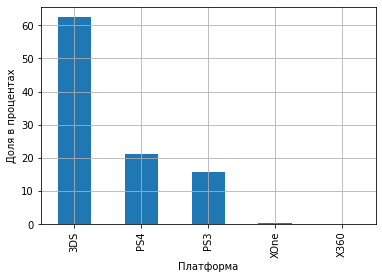

In [ ]:
jp_sales_sum = games_result['jp_sales'].sum() # Общая сумма продаж в Японии
percent_jp = games_result.groupby('platform')['jp_sales'].sum() / jp_sales_sum * 100

print('Доля продаж в Японии:')
print(percent_jp.sort_values(ascending=False).head())
percent_jp.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)
plt.xlabel('Платформа')
plt.ylabel('Доля в процентах')

#### Самые популярные жанры (топ-5).

##### Самые популярные жанры в Северной Америке. Топ-5.

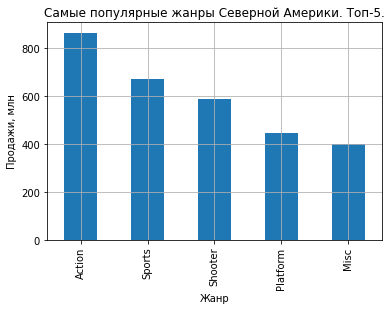

In [ ]:
# группируем
genre_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_na.plot(x='genre', y='na_sales', kind='bar', grid=True, title='Самые популярные жанры Северной Америки. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Самые популярные жанры в Северной Америке за интересующий период. Топ-5.*

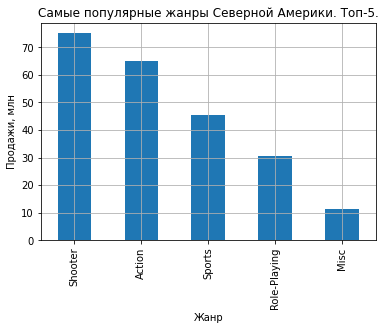

In [ ]:
# группируем
genre_na = games_result.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_na.plot(x='genre', y='na_sales', kind='bar', grid=True, title='Самые популярные жанры Северной Америки. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Доля продаж по жанрам в Северной Америке.*

Доля продаж в Северной Америке:
genre
Shooter         29.699055
Action          25.653498
Sports          17.957844
Role-Playing    12.045715
Misc             4.425199
Name: na_sales, dtype: float64


<AxesSubplot:xlabel='genre'>

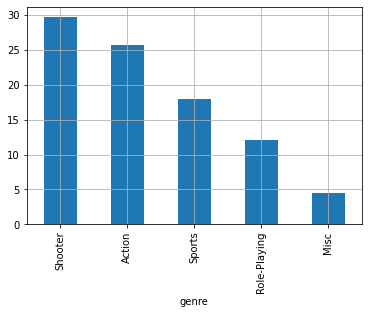

In [ ]:
# доля в процентах
genre_percent_na = games_result.groupby('genre')['na_sales'].sum()/na_sales_sum*100

print('Доля продаж в Северной Америке:')
print(genre_percent_na.sort_values(ascending=False).head())
genre_percent_na.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)

##### Самые популярные жанры в Европе Топ-5.

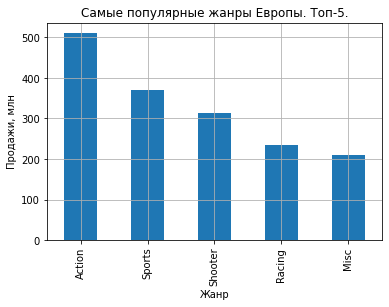

In [ ]:
# группируем
genre_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_eu.plot(x='genre', y='na_sales', kind='bar', grid=True, title='Самые популярные жанры Европы. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Самые популярные жанры в Европе за интересующий период. Топ-5.*

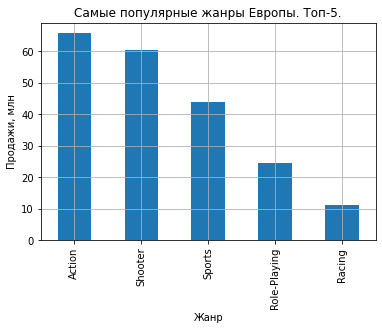

In [ ]:
# группируем
genre_eu = games_result.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_eu.plot(x='genre', y='eu_sales', kind='bar', grid=True, title='Самые популярные жанры Европы. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Доля продаж по жанрам в Европе.*

Доля продаж в Европе:
genre
Action          28.182831
Shooter         25.955278
Sports          18.797121
Role-Playing    10.469500
Racing           4.866347
Name: eu_sales, dtype: float64


<AxesSubplot:xlabel='genre'>

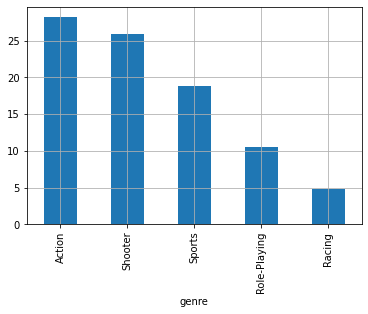

In [ ]:
# доля в процентах
genre_percent_eu = games_result.groupby('genre')['eu_sales'].sum()/eu_sales_sum*100

print('Доля продаж в Европе:')
print(genre_percent_eu.sort_values(ascending=False).head())
genre_percent_eu.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)

##### Самые популярные жанры в Японии. Топ-5.

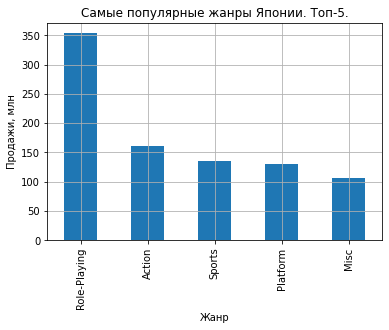

In [ ]:
# группируем
genre_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_jp.plot(x='genre', y='na_sales', kind='bar', grid=True, title='Самые популярные жанры Японии. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Самые популярные жанры в Японии за интересующий период. Топ-5.*

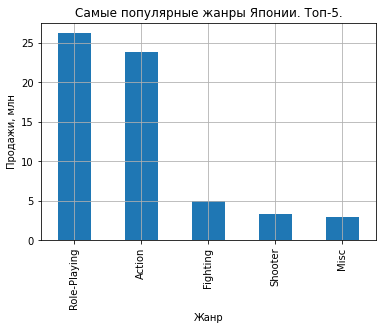

In [ ]:
# группируем
genre_jp = games_result.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
# строим гистограмму
genre_jp.plot(x='genre', y='eu_sales', kind='bar', grid=True, title='Самые популярные жанры Японии. Топ-5.')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн')
plt.show()

*Доля продаж по жанрам в Японии.*

Доля продаж в Японии:
genre
Role-Playing    36.977991
Action          33.563770
Fighting         6.955418
Shooter          4.698081
Misc             4.091422
Name: jp_sales, dtype: float64


<AxesSubplot:xlabel='genre'>

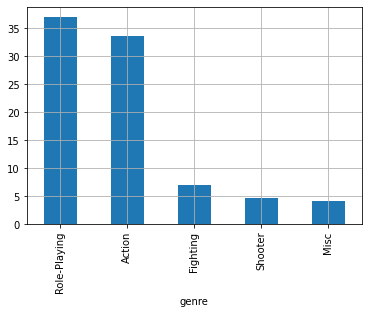

In [ ]:
# доля в процентах
genre_percent_jp = games_result.groupby('genre')['jp_sales'].sum()/jp_sales_sum*100

print('Доля продаж в Японии:')
print(genre_percent_jp.sort_values(ascending=False).head())
genre_percent_jp.sort_values(ascending=False).head().plot(kind='bar', y='sum_sales', grid=True)

#### Влияние рейтинга ESRB на продажи в отдельном регионе.

*Рейтинг ESRB по жанрам в Северной Америке.*

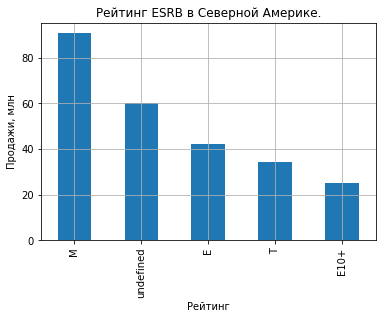

In [ ]:
rating_na = games_result.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_na.plot(x='rating', y='na_sales', kind='bar', grid=True, title='Рейтинг ESRB в Северной Америке.')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн')
plt.show()

*Рейтинг ESRB по жанрам в Европе.*

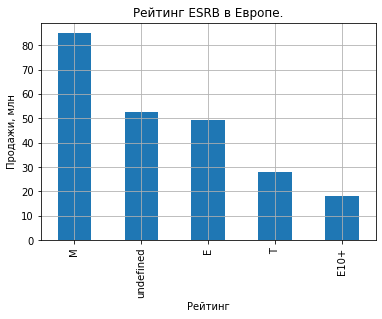

In [ ]:
rating_eu = games_result.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_eu.plot(x='rating', y='na_sales', kind='bar', grid=True, title='Рейтинг ESRB в Европе.')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн')
plt.show()

*Рейтинг ESRB по жанрам в Японии.*

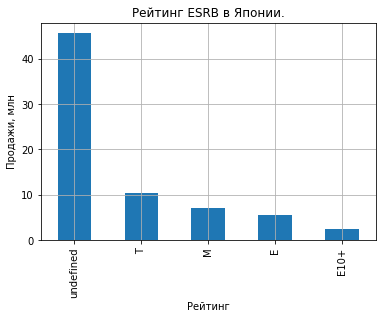

In [ ]:
rating_jp = games_result.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_jp.plot(x='rating', y='na_sales', kind='bar', grid=True, title='Рейтинг ESRB в Японии.')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн')
plt.show()

**По рейтингу ESRB в Северной Америке и Европе самый популярный жанр М (для взрослых), а в Я понии - неопределённый, после нгео Т (для подростков).**

### Проверка гипотез

#### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н0: средние пользовательские рейтинги по платформам одинаковые**

**Н1: средние пользовательские рейтинги по платформам разные**

*Так как в данных за выбранный период отсутствуют данные по платформе PC, возьмем данные за весь период.*

In [ ]:
# исключим пропущенные значения
games.dropna(subset=['user_score'], inplace=True)
games.dropna(subset=['critic_score'], inplace=True)

In [ ]:
games_xbox = games.query('platform == "XOne"')
games_pc = games.query('platform == "PC"')

xbox_1 = games_xbox['user_score']
pc_1 = games_pc['user_score']

alpha = 0.05
results = st.ttest_ind(
xbox_1,
pc_1
)

print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


р-значение: 0.00010211482734739934
Отвергаем нулевую гипотезу


**У нас есть основания утверждать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.**

#### Гипотеза: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Н0: средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**Н1: средние пользовательские рейтинги жанров Action и Sports разные.**

In [ ]:
games_result.dropna(subset=['user_score'], inplace=True)
games_result.dropna(subset=['critic_score'], inplace=True)

games_action = games_result.query('genre == "Action"')
games_sports = games_result.query('genre == "Sports"')

#games_xbox = games.query('platform == "XOne"')
#games_pc = games.query('platform == "PC"')

action_1 = games_action['user_score']
sports_1 = games_sports['user_score']

alpha = 0.05
results = st.ttest_ind(
action_1,
sports_1
)

print('р-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 1.393653768595438e-07
Отвергаем нулевую гипотезу


**У нас есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports различаются.**

### Общий вывод

**В проекте по историческим данным из открытых источников проведена:**

* предобработка данных
* исследовательский анализ данных
* составлен портрет пользователя каждого региона
* проверены гипотезы

При выполнении исследователь ского анализа сделан вывод, что с 1990 года шёл активный рост выпуска компьютерных игр. После 2009 заментно снижение. Оставили для анализа последние три года, так как на первый взгляд видна динамика на уменьшение количества выпускаемых игр, с другой стороны - данные за 2016 год неполные.\
За интересующий нас период для дальнейшего анализа выделили 5 лидеров продаж:
* PS4
* XOne
* 3DS
* PS3
* X360

Выяснили, что оценки критиков имеют большее влияние на продажи, чем оценка пользователей. Оценка пользователей почти не влияет на продажи.

Самые популярные жанры: Shooter, Sports и Platform.\
Наименее популярные: Puzzle, Strategy и Adventure.

За интересующий период выделии Топ-5 платформ в регионах с долей продаж. В Северной Америке и Европе лидирует PS4, в Японии - 3DS. В разных регионах лидируют разные жанры.\
По рейтингу ESRB в Северной Америке и Европе самый популярный жанр М (для взрослых), а в Я понии без рейтигна, далее Т (для подростков).

Проверили гипотезы. У нас есть основание утверждать, что средние пользовательские рейтинги платформ Xbox One и PC и средние пользовательские рейтинги жанров Action и Sports значимо различаются.


Мы выявили определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в зависимости от региона и аудитории.

По итогам проведенного анализа можно сделать вывод на 2017 год в игровой индустрии.

